An analysis of paleo-present climate data
• Analyse CO2 vs Temperature Anomaly from 800kyrs – present.


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CO2 data from Luthi et al. 2008 Nature Paper

"Composite CO2 record (0-800 kyr BP)		
0-22 kyr BP:	Dome C (Monnin et al. 2001) measured at University of Bern	
22-393 kyr BP:	Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble	
393-416 kyr BP:	Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble	
416-664 kyr BP:	Dome C (Siegenthaler et al. 2005)  measured at University of Bern	
664-800 kyr BP:	Dome C (Luethi et al. (sub)) measured at University of Bern	"


In [201]:
path='CO2 data from Luthi et al. 2008 Nature Paper .xls'
sheet_name = '3.  Composite CO2'
CO2_NP_df = pd.read_excel(path, sheet_name, skiprows=6, index_col=None)
CO2_NP_df.rename(columns={'EDC3_gas_a (yr)': 'year', 
'CO2 (ppmv)': 'CO2_NP (ppmv)'}, inplace=True)

In [202]:

print(CO2_NP_df.head())
print("------")
print("shape:", CO2_NP_df.shape)


   year  CO2_NP (ppmv)
0   137          280.4
1   268          274.9
2   279          277.9
3   395          279.1
4   404          281.9
------
shape: (1096, 2)


<AxesSubplot:xlabel='year'>

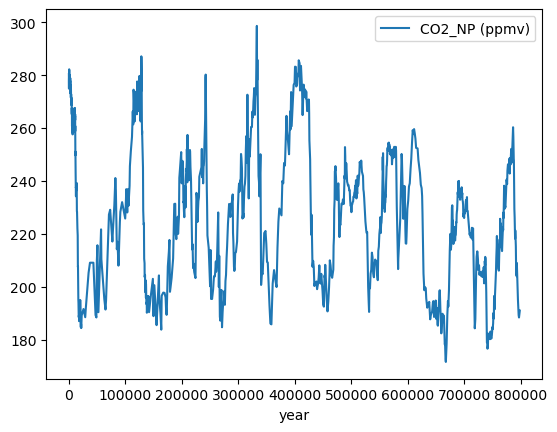

In [203]:
x= ("year")
y= ("CO2_NP (ppmv)")
CO2_NP_df.plot(x, y)


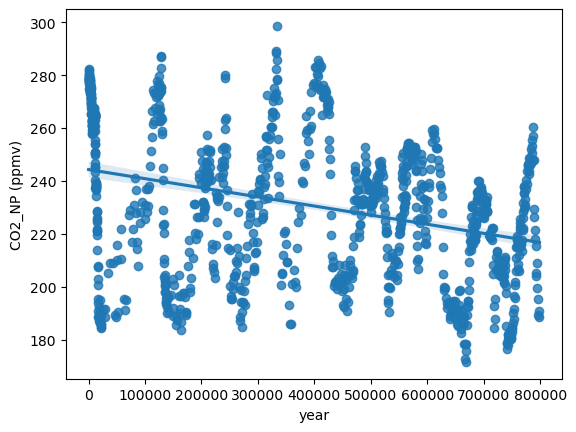

In [204]:


sns.regplot(x="year", y="CO2_NP (ppmv)", data= CO2_NP_df)
plt.show()

CO2 data from IPCC Report

Composite of atmospheric CO2 records from Antarctic ice cores
"Composite CO2 record (0-800 kyr BP)		
-51-1800 yr BP:'	Law Dome (Rubino et al., 2013)	
1.8-2 kyr BP:	Law Dome (MacFarling Meure et al., 2006)	
2-11 kyr BP:	Dome C (Monnin et al., 2001 + 2004)	
11-22 kyr BP:	WAIS (Marcott et al., 2014) minus 4 ppmv (see text)	
22-40 kyr BP:	Siple Dome (Ahn et al., 2014)	
40-60 kyr BP:	TALDICE (Bereiter et al., 2012)	
60-115 kyr BP:	EDML (Bereiter et al., 2012)	
105-155 kyr BP:	Dome C Sublimation (Schneider et al., 2013)	
155-393 kyr BP:	Vostok (Petit et al., 1999)	
393-611 kyr BP:	Dome C (Siegenthaler et al., 2005)	
612-800 kyr BP:	Dome C (Bereiter et al., 2014)	"

Age unit is in years before present (yr BP) whereas present refers to 1950.


In [205]:
path = 'CO2 data from IPCC Report .xls'
CO2_IPCC_df = pd.read_excel(path, sheet_name='CO2 Composite', skiprows=14)
CO2_IPCC_df.drop('sigma mean CO2 (ppmv)', axis=1, inplace=True)
CO2_IPCC_df['yearBP'] = CO2_IPCC_df['Gasage (yr BP) '].astype(int)
CO2_IPCC_df['year']=(1950+CO2_IPCC_df['yearBP'])
CO2_IPCC_df.rename(columns={'CO2 (ppmv)': 'CO2_IPCC (ppmv)'}, inplace=True)
CO2_IPCC_df.drop('yearBP', axis=1, inplace=True)
CO2_IPCC_df.drop('Gasage (yr BP) ', axis=1, inplace=True)

In [206]:
print(CO2_IPCC_df.head())
print("------")
print("shape:", CO2_IPCC_df.shape)

   CO2_IPCC (ppmv)  year
0       368.022488  1899
1       361.780737  1902
2       359.647793  1904
3       357.106740  1906
4       353.946685  1907
------
shape: (1901, 2)


<AxesSubplot:xlabel='year'>

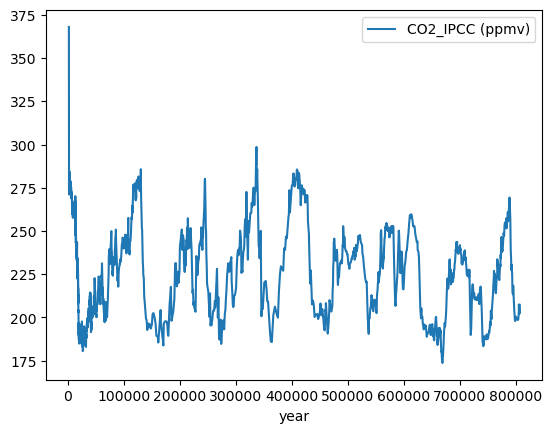

In [207]:

CO2_IPCC_df.plot(x="year", y="CO2_IPCC (ppmv)")

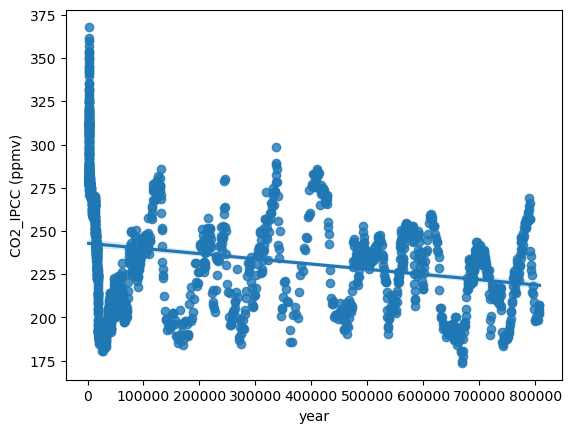

In [208]:
sns.regplot(x="year", y="CO2_IPCC (ppmv)", data= CO2_IPCC_df)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


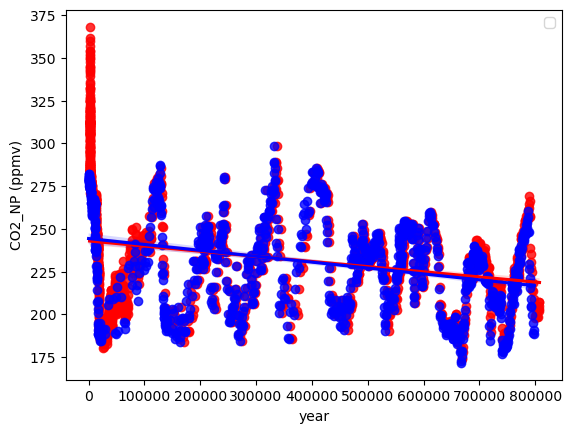

In [209]:
fig, ax=plt.subplots()
sns.regplot(x="year", y="CO2_IPCC (ppmv)", data= CO2_IPCC_df, color='red')
sns.regplot(x="year", y="CO2_NP (ppmv)", data= CO2_NP_df, color='blue')
ax.legend()
plt.show()

we will use CO2_IPCC_df more data points and most of them overlaping and trendline is overlaping aswell.

Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC

bag	
ztop

EDC3béta-EDC3béta is a method of paleo dating that uses the ice core from the European Project for Ice Coring in Antarctica (EPICA) to estimate the age of past climatic events1. It is based on the correlation of the oxygen isotope ratios and the methane concentrations in the ice core with other paleoclimate records2. EDC3béta is an improved version of the previous EDC3 chronology, which had some inconsistencies and uncertainties3.

To convert EDC3béta paleo dating to years, you need to use a conversion table that shows the relationship between the EDC3béta age and the calendar year. For example, according to one table, the EDC3béta age of 10,000 years corresponds to the calendar year of 8,000 BCE. You can also use an online calculator that can convert EDC3béta ages to calendar years and vice versa. However, you should be aware that these conversions are not exact and may have some errors depending on the resolution and accuracy of the data.

AICC2012-AICC2012 stands for Antarctic Ice Core Chronology 2012, which is a new and coherent timescale developed for four Antarctic ice cores, namely Vostok, EPICA Dome C, EPICA Dronning Maud Land, and Talos Dome, as well as the Greenlandic NGRIP record https://www.ncei.noaa.gov/access/paleo-search/study/15076 AICC2012 is a chronology that was developed for four Antarctic ice cores and one Greenland ice core, using various methods to date the ice layers and gas bubbles1. AICC2012 provides the age of the ice and the gas in thousands of years before present (ka BP), where present is defined as 1950 CE

deutfinal	
temp - in Kelvin to convert to Celsius -273.15	
acc-EDC3beta


In [210]:
path='Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC.xls'
Temp_Jouzel_df = pd.read_excel(path)
Temp_Jouzel_df['yearBP'] = Temp_Jouzel_df['AICC2012'].astype(int)
Temp_Jouzel_df['year']=(1950+Temp_Jouzel_df['yearBP'])
Temp_Jouzel_df['temp_Jouzel_C']=(Temp_Jouzel_df['temp']-273.15)
Temp_Jouzel_df.drop('ztop', axis=1, inplace=True)
Temp_Jouzel_df.drop('bag', axis=1, inplace=True)
Temp_Jouzel_df.drop('deutfinal', axis=1, inplace=True)
Temp_Jouzel_df.drop('acc-EDC3beta', axis=1, inplace=True)
Temp_Jouzel_df.drop('EDC3béta', axis=1, inplace=True)
Temp_Jouzel_df.drop('AICC2012', axis=1, inplace=True)
Temp_Jouzel_df.drop('temp', axis=1, inplace=True)
Temp_Jouzel_df.drop('yearBP', axis=1, inplace=True)


In [211]:
print(Temp_Jouzel_df.head())
print("------")
print("shape:", Temp_Jouzel_df.shape)

   year  temp_Jouzel_C
0  1895         -54.85
1  1900         -54.85
2  1904         -54.85
3  1909         -54.85
4  1916         -54.85
------
shape: (5819, 2)


<AxesSubplot:xlabel='year'>

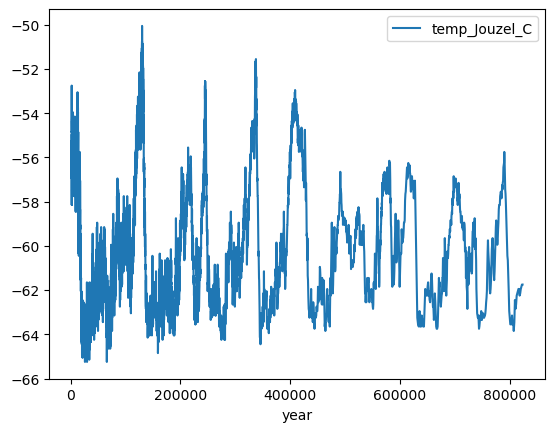

In [212]:

Temp_Jouzel_df.plot(x="year", y="temp_Jouzel_C")


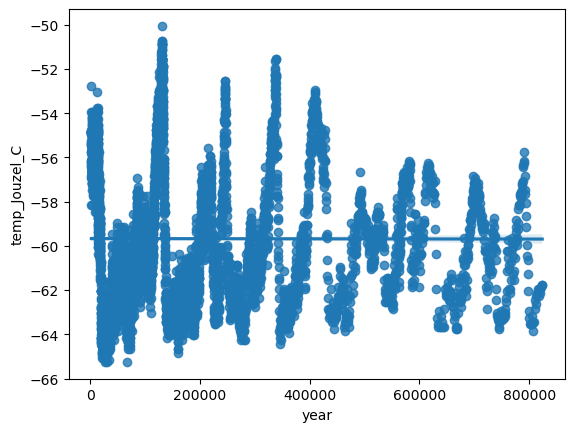

In [213]:
sns.regplot(x="year", y="temp_Jouzel_C", data= Temp_Jouzel_df)
plt.show()

Temperature Data from NOAA

EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates
CONTRIBUTOR: Valérie Masson-Delmotte, LSCE/IPSL 
IGBP PAGES/WDCA CONTRIBUTION SERIES NUMBER: 2007-091

SUGGESTED DATA CITATION: Jouzel, J., et al.  2007.
EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates. 
IGBP PAGES/World Data Center for Paleoclimatology 
Data Contribution Series # 2007-091.
NOAA/NCDC Paleoclimatology Program, Boulder CO, USA.
Column 1: Bag number (55 cm sample)
Column 2: Top depth (m)
Column 3: EDC3 age scale (years before year 1950)
Column 4: dD data (per mille with respect to SMOW)
Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)

In [214]:

Temp_NOAA_df = pd.read_csv('Temperature Data from NOAA.txt',sep='\s+', skiprows=91, index_col=None)
Temp_NOAA_df['yearBP'] = Temp_NOAA_df['Age'].astype(int)
Temp_NOAA_df['year']=(1950+Temp_NOAA_df['yearBP'])
Temp_NOAA_df.drop('Bag', axis=1, inplace=True)
Temp_NOAA_df.drop('ztop', axis=1, inplace=True)
Temp_NOAA_df.drop('Deuterium', axis=1, inplace=True)
Temp_NOAA_df.drop('Age', axis=1, inplace=True)
Temp_NOAA_df.drop('yearBP', axis=1, inplace=True)
Temp_NOAA_df.rename(columns={'Temperature': 'temp_NOAA'}, inplace=True)

In [215]:
print(Temp_NOAA_df.head())
print("------")
print("shape:", Temp_NOAA_df.shape)

   temp_NOAA  year
0        NaN  1900
1        NaN  1907
2        NaN  1913
3        NaN  1919
4        NaN  1926
------
shape: (5800, 2)


<AxesSubplot:xlabel='year'>

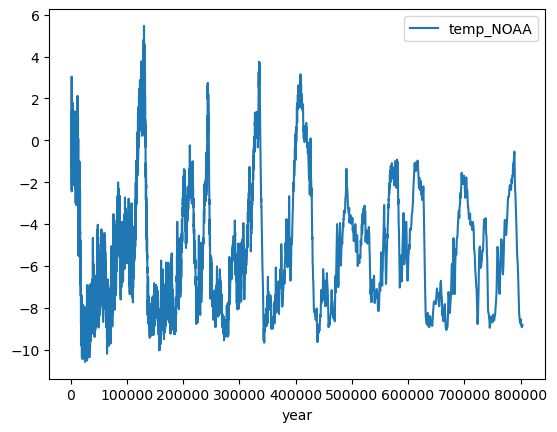

In [216]:
Temp_NOAA_df.plot(x="year", y="temp_NOAA")

<AxesSubplot:xlabel='year', ylabel='temp_NOAA'>

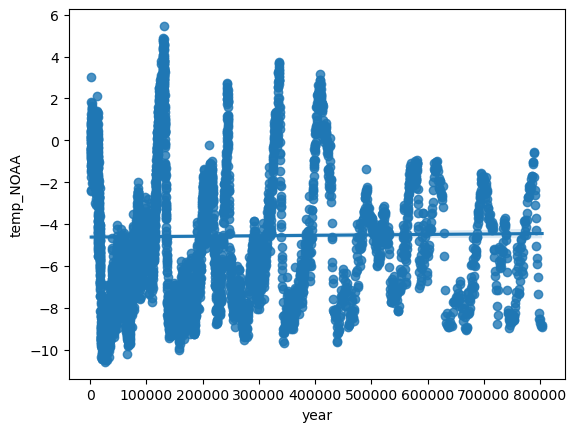

In [217]:
sns.regplot(x="year", y="temp_NOAA", data= Temp_NOAA_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


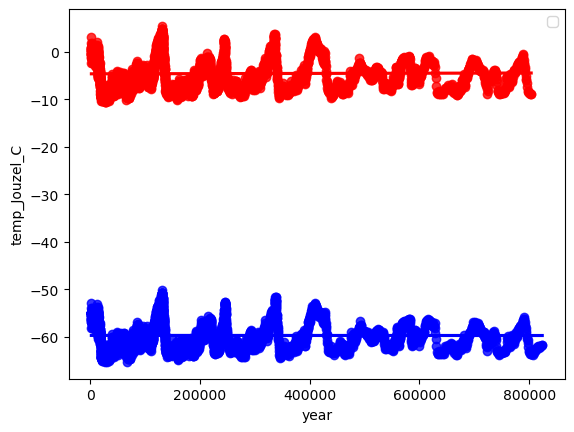

In [218]:
fig, ax=plt.subplots()
sns.regplot(x="year", y="temp_NOAA", data= Temp_NOAA_df, color='red')
sns.regplot(x="year", y="temp_Jouzel_C", data= Temp_Jouzel_df, color='blue')
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


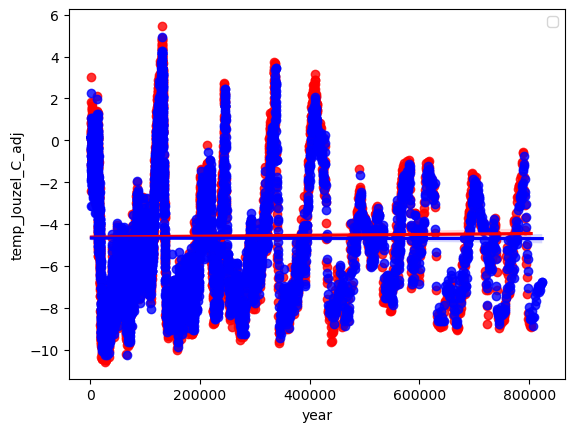

In [219]:
fig, ax=plt.subplots()
sns.regplot(x="year", y="temp_NOAA", data= Temp_NOAA_df, color='red')
Temp_Jouzel_df['temp_Jouzel_C_adj']=(55+Temp_Jouzel_df['temp_Jouzel_C'])
sns.regplot(x="year", y="temp_Jouzel_C_adj", data= Temp_Jouzel_df, color='blue')
ax.legend()
plt.show()

• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)


Sea Level.


Global Average Absolute Sea Level Change, 1880-2021",,,,
Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,,,,
"Data source: CSIRO, 2017; NOAA, 2022",,,,
Web update: July 2022,,,,
Units: inches,,,,

In [220]:
url= 'sea-level_fig-1.csv'
sea_level_df=pd.read_csv(url ,skiprows=6)
sea_level_df.rename(columns={'Year': 'year'}, inplace=True)

In [221]:
print(sea_level_df.head())
print("------")
print("shape:", sea_level_df.shape)

   year  CSIRO - Adjusted sea level (inches)  \
0  1880                             0.000000   
1  1881                             0.220472   
2  1882                            -0.440945   
3  1883                            -0.232283   
4  1884                             0.590551   

   CSIRO - Lower error bound (inches)  CSIRO - Upper error bound (inches)  \
0                           -0.952756                            0.952756   
1                           -0.732283                            1.173228   
2                           -1.346457                            0.464567   
3                           -1.129921                            0.665354   
4                           -0.283465                            1.464567   

   NOAA - Adjusted sea level (inches)  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  
------
s

<AxesSubplot:xlabel='year'>

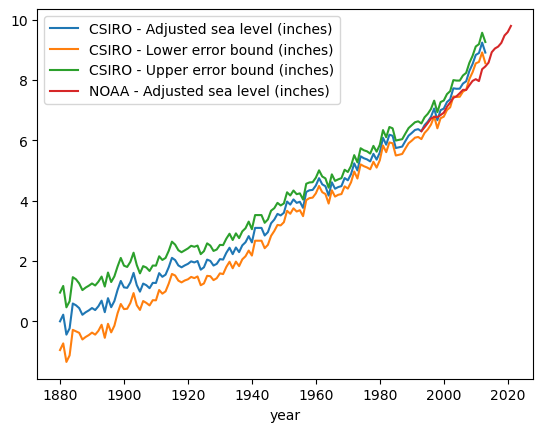

In [222]:

df = sea_level_df.set_index('year')
df.plot()

<AxesSubplot:xlabel='year'>

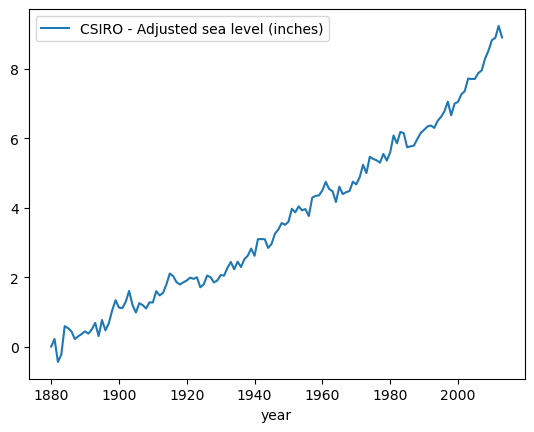

In [223]:
sea_level_df.plot(x="year", y="CSIRO - Adjusted sea level (inches)")

In [224]:
print(sea_level_df.head())
print("------")
print("shape:", sea_level_df.shape)

   year  CSIRO - Adjusted sea level (inches)  \
0  1880                             0.000000   
1  1881                             0.220472   
2  1882                            -0.440945   
3  1883                            -0.232283   
4  1884                             0.590551   

   CSIRO - Lower error bound (inches)  CSIRO - Upper error bound (inches)  \
0                           -0.952756                            0.952756   
1                           -0.732283                            1.173228   
2                           -1.346457                            0.464567   
3                           -1.129921                            0.665354   
4                           -0.283465                            1.464567   

   NOAA - Adjusted sea level (inches)  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  
------
s

Global Sea Level Reconstruction using Stacked Records from 0-800 ka
#-----------------------------------------------------------------------
#               World Data Center for Paleoclimatology, Boulder
#                                   and
#                      NOAA Paleoclimatology Program

Variables
# Data variables follow that are preceded by "##" in columns one and two.
# Variables list, one per line, shortname-tab-longname components (9 components: what, material, error, units, seasonality, archive, detail, method, C or N for Character or Numeric data)
## age_calkaBP	Age,,,calendar ka BP,,,,,N
## SeaLev_shortPC1	Sea Level,,,meters above present day,,climate reconstructions,,Scaled first principal component of seven sea level reconstructions (0-430 ka),N
## SeaLev_shortPC1_err_sig	Sea Level,,standard deviation from bootstrap,meters,,climate reconstructions,,Scaled first principal component of seven sea level reconstructions (0-430 ka),N
## SeaLev_shortPC1_err_lo	Sea Level,,95% confidence interval, lower bound,meters,,climate reconstructions,,Scaled first principal component of seven sea level reconstructions (0-430 ka),N
## SeaLev_shortPC1_err_up	Sea Level,,95% confidence interval, upper bound,meters,,climate reconstructions,,Scaled first principal component of seven sea level reconstructions (0-430 ka),N
## SeaLev_longPC1	Sea Level,,,meters above present day,,climate reconstructions,,Scaled first principal component of five sea level reconstructions (0-798 ka),N
## SeaLev_longPC1_err_sig	Sea Level,,standard deviation from bootstrap,meters,,climate reconstructions,,Scaled first principal component of five sea level reconstructions (0-798 ka),N
## SeaLev_longPC1_err_lo	Sea Level,,95% confidence interval, lower bound,meters,,climate reconstructions,,Scaled first principal component of five sea level reconstructions (0-798 ka),N
## SeaLev_longPC1_err_up	Sea Level,,95% confidence interval, upper bound,meters,,climate reconstructions,,Scaled first principal component of five sea level reconstructions (0-798 ka),N

In [225]:

sea_level_NOAA_df = pd.read_csv('sea-level 800000-3000.txt',sep='\s+', skiprows=95, index_col=False)
sea_level_NOAA_df.drop('age_calkaBP', axis=1, inplace=True)
sea_level_NOAA_df['year']=(1950-sea_level_NOAA_df['SeaLev_shortPC1']*1000)
sea_level_NOAA_df.dropna(subset=['year'], inplace=True)
sea_level_NOAA_df['year'] = sea_level_NOAA_df['year'].astype(int)
sea_level_NOAA_df.drop('SeaLev_shortPC1_err_up', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_shortPC1', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_shortPC1_err_sig', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_shortPC1_err_lo', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_longPC1_err_lo', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_longPC1_err_up', axis=1, inplace=True)
sea_level_NOAA_df.drop('SeaLev_longPC1_err_sig', axis=1, inplace=True)

sea_level_NOAA_df.sort_values(by='year', inplace=True)


In [226]:
print(sea_level_NOAA_df.head())
print("------")
print("shape:", sea_level_NOAA_df.shape)

     SeaLev_longPC1   year
404           19.02 -14010
400           18.54 -12640
403           17.86 -12610
401           17.75 -12100
402           16.30 -11060
------
shape: (431, 2)


<AxesSubplot:xlabel='year'>

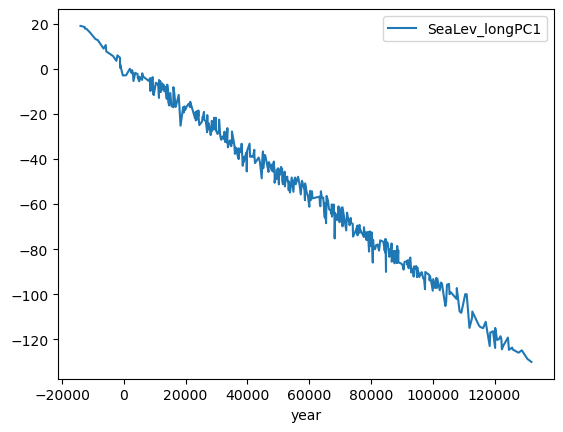

In [227]:
df = sea_level_NOAA_df.set_index('year')
df.plot()

• Examine Irish context:
o Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)


Composite Rainfall Time Series from 1711-2016 for Ireland
"A continuous 305-year (1711-2016) monthly rainfall series has been created for the Island of Ireland using two key data sources, i) a previously unpublished UK Meteorological Office Note which contains annual rainfall anomalies and corresponding proportional monthly totals based on weather diaries and early observational records for the period 1711-1977 and, ii) a long-term, homogenised monthly rainfall series for the island for the period 1850-2016." https://www.met.ie/climate/available-data/long-term-data-sets/#MonthlyIIP

https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/joc.4522

In [228]:
url='Composite Rainfall Time Series from 1711-2016 for Ireland.CSV'
irish_rainfall_df=pd.read_csv(url)
irish_rainfall_df['Date'] = pd.to_datetime(irish_rainfall_df[['Year','Month']].assign(DAY=1))
irish_rainfall_df.drop('Year', axis=1, inplace=True)
irish_rainfall_df.drop('Month', axis=1, inplace=True)

In [229]:
print(irish_rainfall_df.head())
print("------")
print("shape:", irish_rainfall_df.shape)

   Median montly series       Date
0                  16.4 1711-01-01
1                  73.1 1711-02-01
2                 121.2 1711-03-01
3                  85.2 1711-04-01
4                  66.6 1711-05-01
------
shape: (3672, 2)


<AxesSubplot:xlabel='Date'>

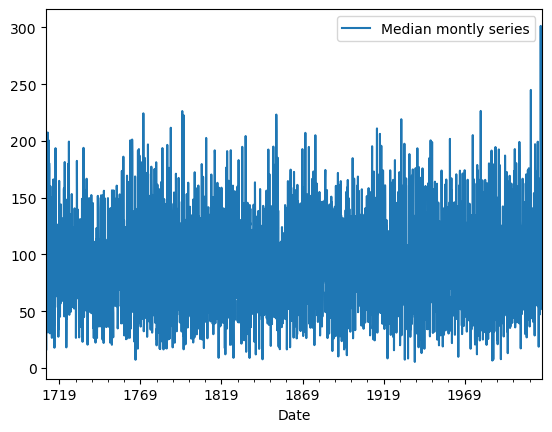

In [230]:
irish_rainfall_df.plot(x="Date", y="Median montly series")

In [231]:
rain_mean_year=irish_rainfall_df.groupby(pd.PeriodIndex(irish_rainfall_df['Date'], freq="Y"))['Median montly series'].mean()

<AxesSubplot:xlabel='Date'>

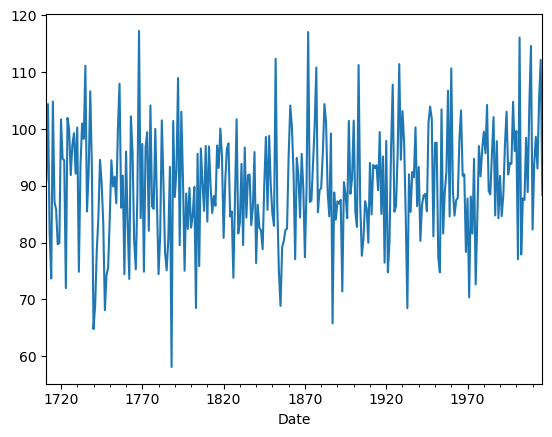

In [232]:
rain_mean_year.plot(x="Date")

In [270]:
from sklearn.linear_model import LinearRegression
x = irish_rainfall_df['Date'].values.reshape(-1, 1) # predictor variable
y = irish_rainfall_df['Median montly series'].values # response variable
model = LinearRegression().fit(x, y)


Phoenix Park Dublin
i. Phoenix Park Dublin_1831-1958.CSV
 Once daily observations.
IRELAND LONG-TERM MAXIMUM AND MINIMUM AIR TEMPERATURE 
DATASET (ILMMT)
DATASET INFORMATION
If using this dataset please cite:
Mateus, C., Potito, A., Curley, M. 2020. Reconstruction of a long-term historical daily 
maximum and minimum air temperature network dataset for Ireland (1831-1968). 
Geoscience Data Journal. 00:1–14. https://doi.org/10.1002/gdj3.92

https://rmets.onlinelibrary.wiley.com/doi/10.1002/gdj3.92

In [233]:
url='Phoenix Park Dublin_1831-1958.csv'
irish_temp_df=pd.read_csv(url)
irish_temp_df['Date'] = pd.to_datetime(irish_temp_df[['Year','Month','Day']])
irish_temp_df.drop('Year', axis=1, inplace=True)
irish_temp_df.drop('Month', axis=1, inplace=True)
irish_temp_df.drop('Day', axis=1, inplace=True)
irish_temp_df.drop('Max (F)', axis=1, inplace=True)
irish_temp_df.drop('Min (F)', axis=1, inplace=True)

In [234]:
print(irish_temp_df.head())
print("------")
print("shape:", irish_temp_df.shape)

   Max (C)  Min (C)       Date
0      NaN      NaN 1831-01-01
1      NaN      NaN 1831-01-02
2      NaN      NaN 1831-01-03
3      NaN      NaN 1831-01-04
4      NaN      NaN 1831-01-05
------
shape: (46751, 3)


<AxesSubplot:xlabel='Date'>

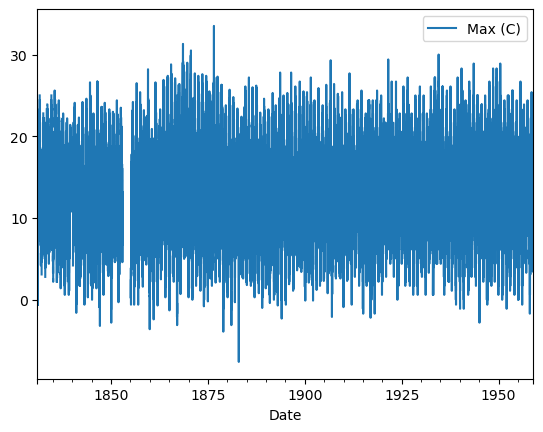

In [235]:

irish_temp_df.plot(x="Date", y="Max (C)")

In [236]:
mean_year=irish_temp_df.groupby(pd.PeriodIndex(irish_temp_df['Date'], freq="Y"))['Max (C)'].mean()

<AxesSubplot:xlabel='Date'>

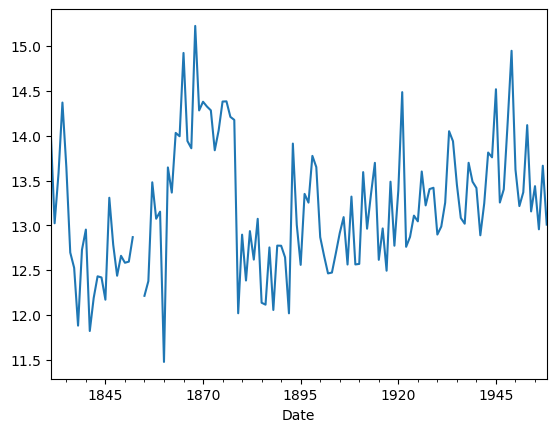

In [237]:
mean_year.plot(x="Date")

In [238]:
august_data = irish_temp_df.loc[(irish_temp_df['Date'].dt.month == 1)]

<AxesSubplot:xlabel='Date'>

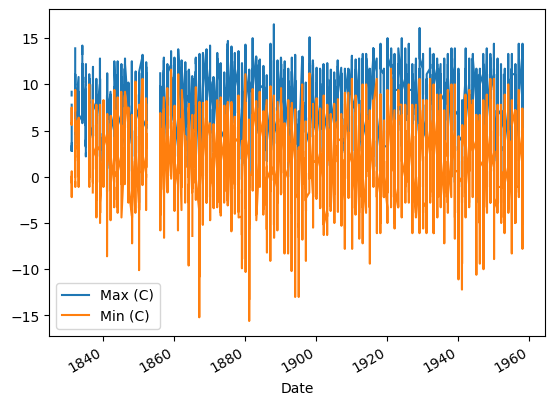

In [239]:
august_data.plot(x="Date")

www.met.ie/cms/assets/uploads/2023/12//LongTermTemperatures_1900_2022_annual.csv

In [240]:

met_ie_temp_df=pd.read_csv('LongTermTemperatures_1900-2022_annual.csv')

In [241]:
print(met_ie_temp_df.head())
print("------")
print("shape:", met_ie_temp_df.shape)

   year  Annual
0  2022    10.9
1  2021    10.5
2  2020    10.4
3  2019    10.5
4  2018    10.3
------
shape: (123, 2)


<AxesSubplot:xlabel='year'>

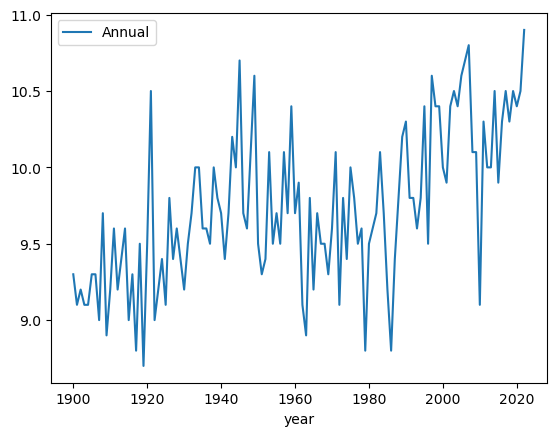

In [242]:
met_ie_temp_df.plot(x="year", y="Annual")

• Fuse and analyse data from various data sources and format fused data set as a pandas 
dataframe and export to csv and json formats


In [243]:

CO2_merge_df= pd.merge(CO2_NP_df, CO2_IPCC_df, on="year", how="outer")
temp_merge_df= pd.merge(Temp_NOAA_df, Temp_Jouzel_df, on="year", how="outer")
merge_CO2_temp_df= pd.merge(CO2_merge_df, temp_merge_df, on="year", how="outer")
all_CO2_temp_sealev_df=pd.merge(merge_CO2_temp_df, sea_level_NOAA_df, on="year", how="outer")
#all_CO2_temp_sealev_df['year'] = pd.to_datetime(all_CO2_temp_sealev_df['year'], format='%y')

In [244]:
print(all_CO2_temp_sealev_df.head(),)
print("------")
print("shape:", all_CO2_temp_sealev_df.shape)
display(all_CO2_temp_sealev_df)

   year  CO2_NP (ppmv)  CO2_IPCC (ppmv)  temp_NOAA  temp_Jouzel_C  \
0   137          280.4              NaN        NaN            NaN   
1   268          274.9              NaN        NaN            NaN   
2   279          277.9              NaN        NaN            NaN   
3   395          279.1              NaN        NaN            NaN   
4   404          281.9              NaN        NaN            NaN   

   temp_Jouzel_C_adj  SeaLev_longPC1  
0                NaN             NaN  
1                NaN             NaN  
2                NaN             NaN  
3                NaN             NaN  
4                NaN             NaN  
------
shape: (14759, 7)


,year,CO2_NP (ppmv),CO2_IPCC (ppmv),temp_NOAA,temp_Jouzel_C,temp_Jouzel_C_adj,SeaLev_longPC1
0,137,280.4,NaN,NaN,NaN,NaN,NaN
1,268,274.9,NaN,NaN,NaN,NaN,NaN
2,279,277.9,NaN,NaN,NaN,NaN,NaN
3,395,279.1,NaN,NaN,NaN,NaN,NaN
4,404,281.9,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
14754,125900,NaN,NaN,NaN,NaN,NaN,-124.50
14755,127770,NaN,NaN,NaN,NaN,NaN,-125.91
14756,128840,NaN,NaN,NaN,NaN,NaN,-124.87
14757,130670,NaN,NaN,NaN,NaN,NaN,-128.71


In [245]:
#df[['CO2_NP (ppmv)', 'CO2_IPCC (ppmv)','temp_NOAA','temp_Jouzel_C_adj']].plot()
#df = merge_df.set_index('year')
#df.plot()


In [246]:
#merge_csv_data = merge_df.to_csv('merge.csv', index = True)
all_CO2_temp_sealev_df.to_csv('merge_all.csv', index=False)




In [247]:
#merge_df.to_json('merge.json')

• For all of the above variables, analyse the data, the trends and the relationships between 
them (temporal leads/lags/frequency analysis).


<AxesSubplot:xlabel='year'>

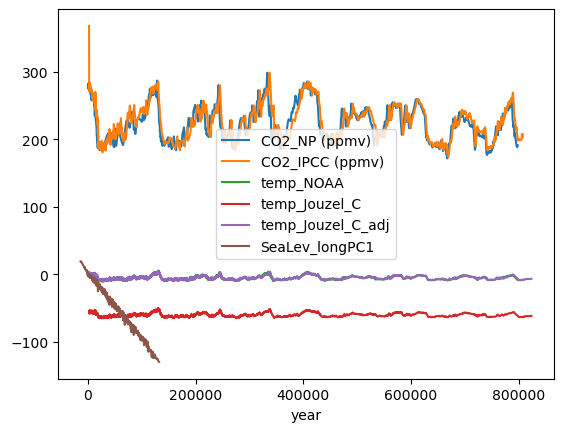

In [248]:

df = all_CO2_temp_sealev_df.set_index('year')
df.plot()

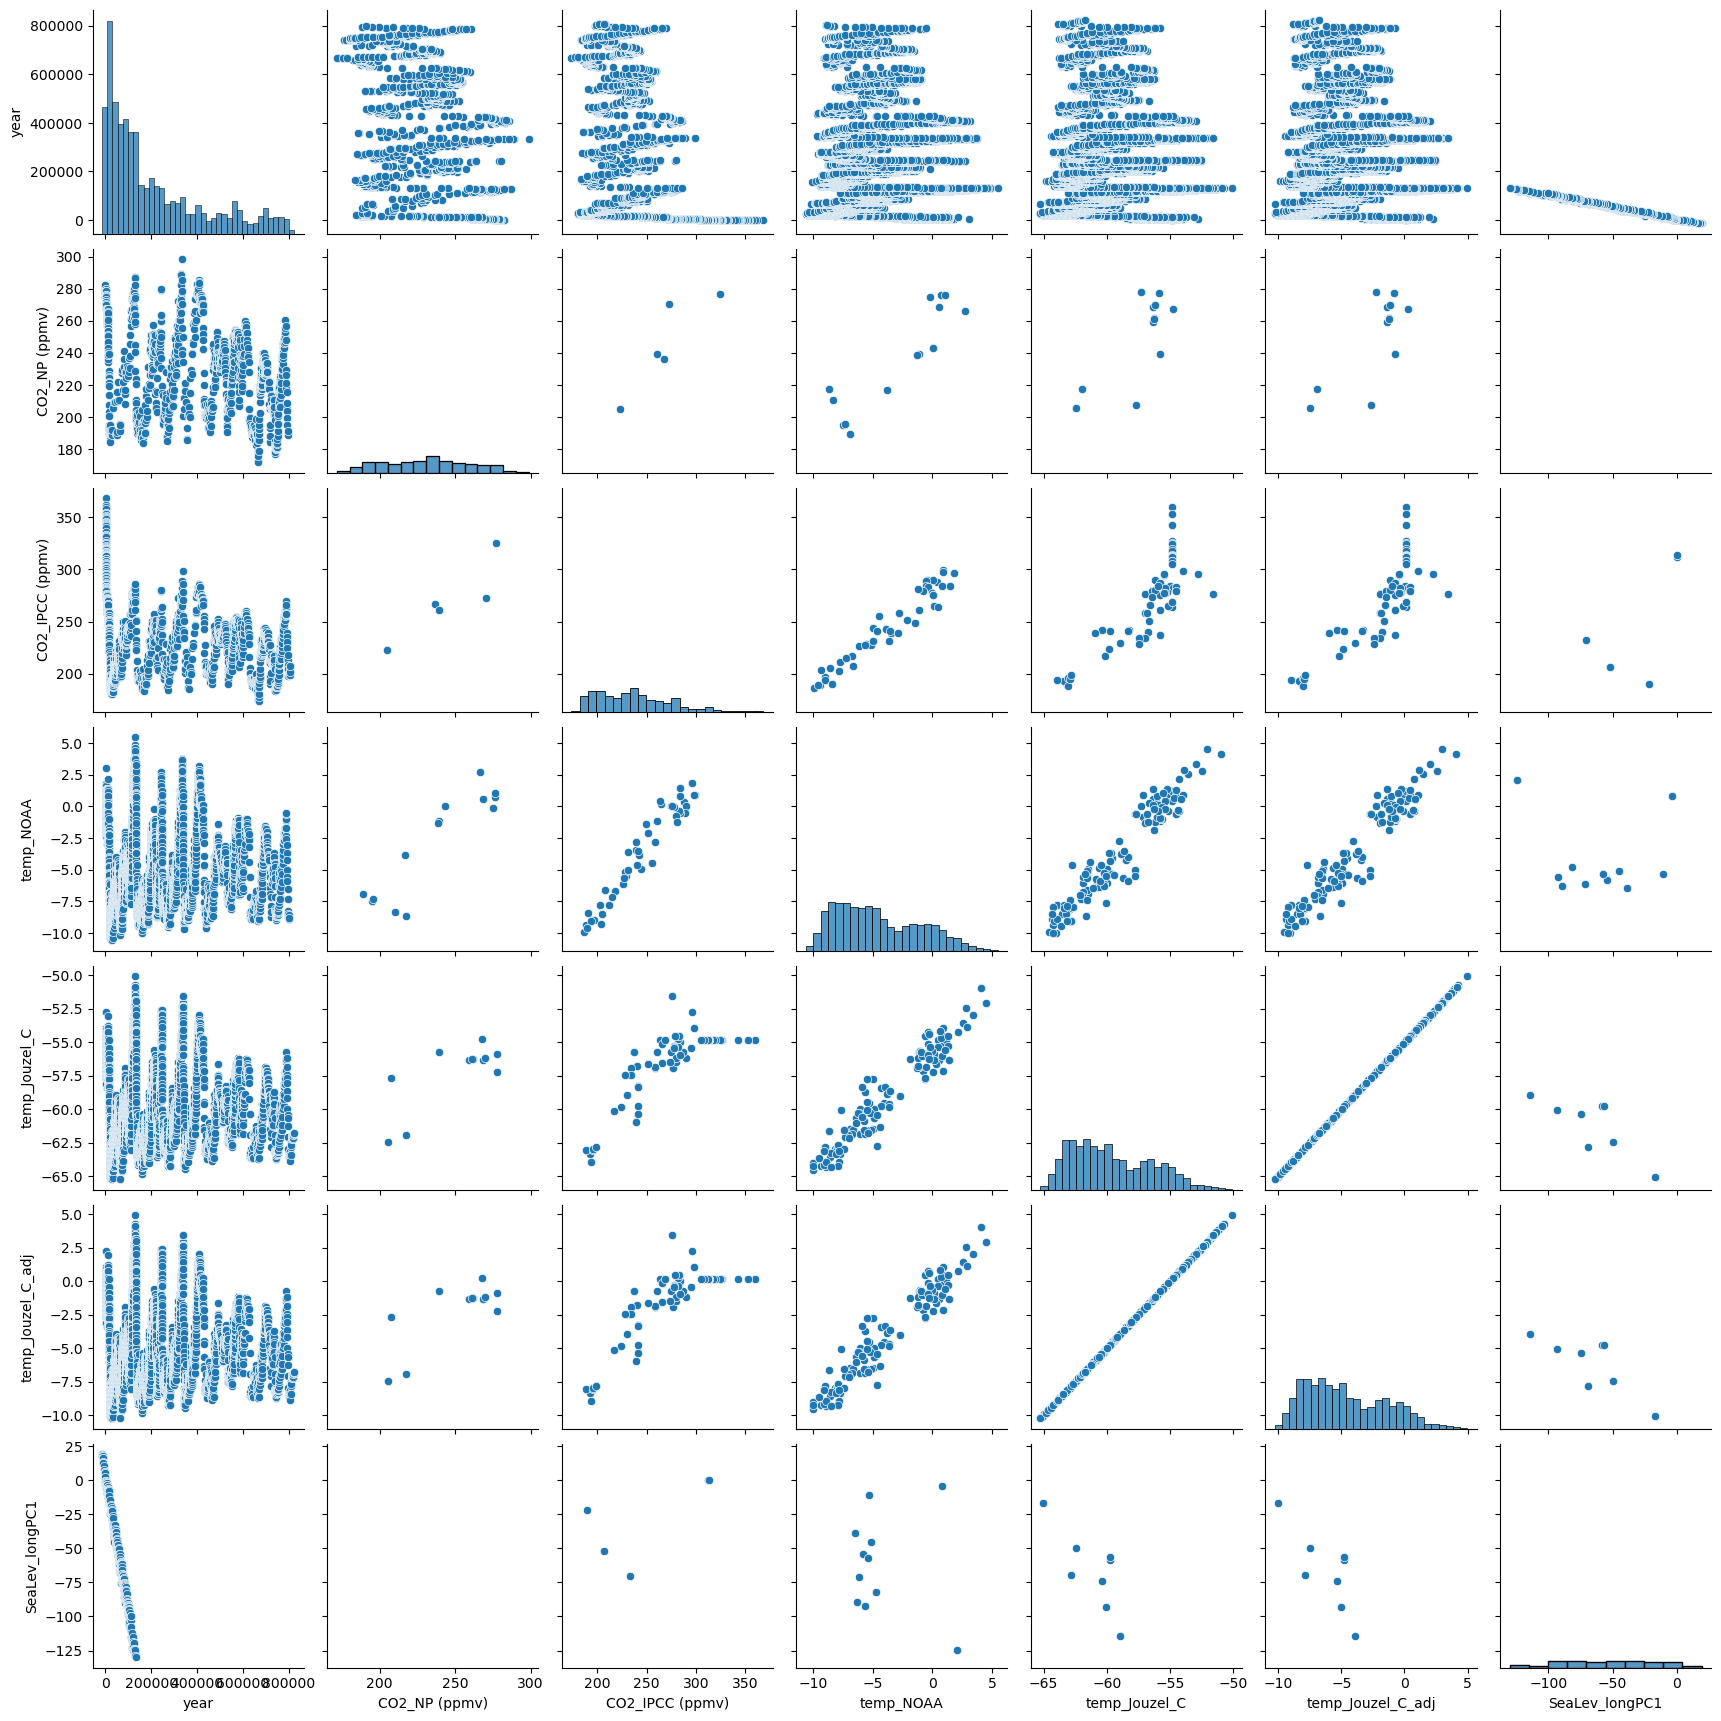

In [249]:
pairplot = sns.pairplot(all_CO2_temp_sealev_df)
plt.show()

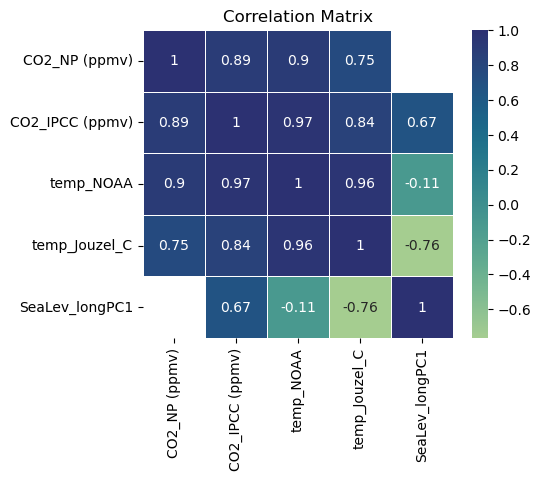

In [250]:
columns_to_plot = ['CO2_NP (ppmv)',  'CO2_IPCC (ppmv)',  'temp_NOAA',  'temp_Jouzel_C','SeaLev_longPC1']

heatmap_df = all_CO2_temp_sealev_df[columns_to_plot]

correlation_matrix = heatmap_df.corr()


plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [251]:
#all_CO2_temp_sealev_df['year'] = pd.to_datetime(all_CO2_temp_sealev_df['year'],format='%Y')

In [252]:
all_CO2_temp_sealev_df['year'] = pd.to_datetime(all_CO2_temp_sealev_df['year'])

In [255]:
print(all_CO2_temp_sealev_df.head())
print("------")
print("shape:", all_CO2_temp_sealev_df.shape)
display(all_CO2_temp_sealev_df)

                           year  CO2_NP (ppmv)  CO2_IPCC (ppmv)  temp_NOAA  \
0 1970-01-01 00:00:00.000000137          280.4              NaN        NaN   
1 1970-01-01 00:00:00.000000268          274.9              NaN        NaN   
2 1970-01-01 00:00:00.000000279          277.9              NaN        NaN   
3 1970-01-01 00:00:00.000000395          279.1              NaN        NaN   
4 1970-01-01 00:00:00.000000404          281.9              NaN        NaN   

   temp_Jouzel_C  temp_Jouzel_C_adj  SeaLev_longPC1  
0            NaN                NaN             NaN  
1            NaN                NaN             NaN  
2            NaN                NaN             NaN  
3            NaN                NaN             NaN  
4            NaN                NaN             NaN  
------
shape: (14759, 7)


,year,CO2_NP (ppmv),CO2_IPCC (ppmv),temp_NOAA,temp_Jouzel_C,temp_Jouzel_C_adj,SeaLev_longPC1
0,1970-01-01 00:00:00.000000137,280.4,NaN,NaN,NaN,NaN,NaN
1,1970-01-01 00:00:00.000000268,274.9,NaN,NaN,NaN,NaN,NaN
2,1970-01-01 00:00:00.000000279,277.9,NaN,NaN,NaN,NaN,NaN
3,1970-01-01 00:00:00.000000395,279.1,NaN,NaN,NaN,NaN,NaN
4,1970-01-01 00:00:00.000000404,281.9,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
14754,1970-01-01 00:00:00.000125900,NaN,NaN,NaN,NaN,NaN,-124.50
14755,1970-01-01 00:00:00.000127770,NaN,NaN,NaN,NaN,NaN,-125.91
14756,1970-01-01 00:00:00.000128840,NaN,NaN,NaN,NaN,NaN,-124.87
14757,1970-01-01 00:00:00.000130670,NaN,NaN,NaN,NaN,NaN,-128.71


In [262]:
from scipy import signal
x = [all_CO2_temp_sealev_df['CO2_IPCC (ppmv)']]
y = [all_CO2_temp_sealev_df['CO2_NP (ppmv)']]
correlation = signal.correlate(x-np.mean(x), y - np.mean(y), mode="full")
lags = signal.correlation_lags(len(x), len(y), mode="full")
lag = lags[np.argmax(abs(correlation))]

print(f"The lag between x and y is {lag}.")

The lag between x and y is 0.


In [263]:
datax = [all_CO2_temp_sealev_df['CO2_IPCC (ppmv)']]
datay = [all_CO2_temp_sealev_df['CO2_NP (ppmv)']]
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

• Predict global temperature anomaly over next few decades (synthesise data) and compare to 
published climate models if atmospheric CO2 trends continue


In [265]:
from sklearn.linear_model import LinearRegression
X = all_CO2_temp_sealev_df['year'].values.reshape(-1, 1) # predictor variable
y = all_CO2_temp_sealev_df['CO2_IPCC (ppmv)'].values # response variable
model = LinearRegression().fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

• Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)


References
https://www.epa.gov/climate-indicators/climate-change-indicators-sea-level
Link to CO2 data from Luthi et al. 2008 Nature Paper 
Link to CO2 data from IPCC Report (Link below) 
epicaDC.deuttemp.EDC3-AICC.xls 
Temperature Data from NOAA https://www.ncei.noaa.gov/access/paleo-search/study/6080
https://www.met.ie/climate/available-data/long-term-data-sets/

https://www.sciencedirect.com/science/article/pii/S2212094723000610

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/joc.4522



